In [1]:
import numpy as np
import pandas as pd
import networkx as nx

In [2]:
herb_edges = pd.read_csv("../data/datahh.csv", index_col=0)
symptom_edges = pd.read_csv("../data/datass.csv", index_col=0)
protein_edges = pd.read_csv("../data/datatt.csv", index_col=0)
herb_to_symptom = pd.read_csv("../data/datahs.csv", index_col=0)
herb_to_protein = pd.read_csv("../data/dataht.csv", index_col=0)

In [3]:
herb_edges["herb1"] = 'H' + herb_edges["herb1"].astype(str)
herb_edges["herb2"] = 'H' + herb_edges["herb2"].astype(str)

symptom_edges["sym1"] = 'S' + symptom_edges["sym1"].astype(str)
symptom_edges["sym2"] = 'S' + symptom_edges["sym2"].astype(str)

protein_edges["target1"] = 'T' + protein_edges["target1"].astype(str)
protein_edges["target2"] = 'T' + protein_edges["target2"].astype(str)

herb_to_symptom["Herb_ID"] = 'H' + herb_to_symptom["Herb_ID"].astype(str)
herb_to_symptom["symptom"] = 'S' + herb_to_symptom["symptom"].astype(str)

herb_to_protein["Herb"] = 'H' + herb_to_protein["Herb"].astype(str)
herb_to_protein["target"] = 'P' + herb_to_protein["target"].astype(str)

In [4]:
symptom_edges

,sym1,sym2
0,S615,S182
1,S615,S277
2,S615,S714
3,S615,S795
4,S615,S82
...,...,...
36125,S321,S876
36126,S321,S997
36127,S321,S930
36128,S321,S510


In [5]:
#Create separate graphs for each layer
herb_graph = nx.from_pandas_edgelist(herb_edges, 'herb1', 'herb2')
symptom_graph = nx.from_pandas_edgelist(symptom_edges, 'sym1', 'sym2')
protein_graph = nx.from_pandas_edgelist(protein_edges, 'target1', 'target2')
herb_to_symptom_graph = nx.from_pandas_edgelist(herb_to_symptom, 'Herb_ID', 'symptom')
herb_to_protein_graph = nx.from_pandas_edgelist(herb_to_protein, 'Herb', 'target')

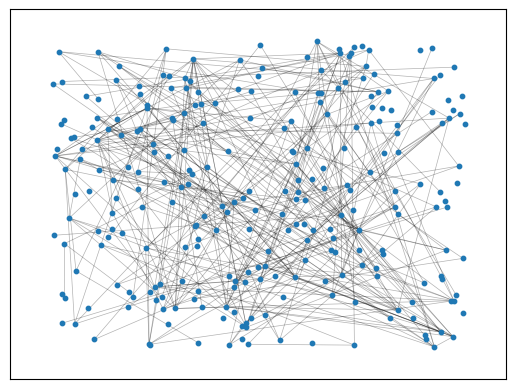

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_layer_graph(layer_graph):
    pos = nx.random_layout(layer_graph)

    # Draw a subset of edges
    subset_edges = np.array(layer_graph.edges())
    np.random.shuffle(subset_edges)
    subset_edges = subset_edges[:300]

    nx.draw_networkx_nodes(layer_graph, pos, node_size=10, alpha=1,)
    nx.draw_networkx_edges(layer_graph, pos, edgelist=subset_edges, width=0.5, alpha=0.3)

    plt.show()

plot_layer_graph(herb_graph)

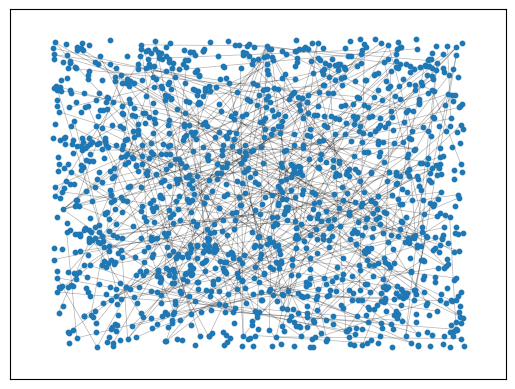

In [7]:
plot_layer_graph(herb_to_symptom_graph)

In [8]:
multi_layer_graph = nx.Graph()

# Add nodes from each layer
multi_layer_graph.add_nodes_from(herb_graph.nodes, layer='herb')
multi_layer_graph.add_nodes_from(protein_graph.nodes, layer='protein')
multi_layer_graph.add_nodes_from(symptom_graph.nodes, layer='symptom')

# Add edges from each layer
multi_layer_graph.add_edges_from(herb_graph.edges,layer='herb')
multi_layer_graph.add_edges_from(protein_graph.edges, layer='protein')
multi_layer_graph.add_edges_from(symptom_graph.edges, layer="symptom")

# Add edges between layers
multi_layer_graph.add_edges_from(herb_to_protein_graph.edges, layer= "herb_to_protein")
multi_layer_graph.add_edges_from(herb_to_symptom_graph.edges, layer="herb_to_symptom");

In [9]:
c = 0
for node1, node2, layer in multi_layer_graph.edges(data="layer"):
    c+=1
    if c == 10:
        break

In [10]:
from local_similarity_indices import features, calc_local_similarity

g = multi_layer_graph
avg_neighbors = sum(deg for _, deg in g.degree() for node in g) / len(g)  # Calculate average neighbors for the entire g
r = calc_localsi_milarity(multi_layer_graph, node1, node2, avg_neighbors)

In [11]:
for i,f in enumerate(features):
    print(f"{i}th : {f(**r)}")
    

0th : 186
1th : 0.44819277108433736
2th : 0.6189760975462139
3th : 0.30948419301164726
4th : 90298
5th : 33.54562804357255
6th : 0.9395959595149526
7th : 0.6220735785953178
8th : 0.6158940397350994
9th : 0.0020598462867394626
10th : 2.2811649059109423e-08
11th : 1.2379676183304171
12th : 6108426.0
13th : 14.406533347241504
14th : 1367.7231989556487
15th : 6.696708725948271e-07
16th : 36.459780328615054


In [14]:
from local_similarity_indices import features, calc_local_similarity

for node1, node2, layer in multi_layer_graph.edges(data="layer"):
    if layer in ["herb_to_protein", "herb_to_symptom"]:
        r = calc_local_similarity(multi_layer_graph, node1, node2, avg_neighbors)
        for i,f in enumerate(features):
            print(f"{i}th : {f(**r)}")
        break

0th : 12
1th : 0.014723926380368098
2th : 0.0325862641172738
3th : 0.015681544028950542
4th : 159154
5th : 2.3149213379487175
6th : 0.051364422326451116
7th : 0.04304635761589404
8th : 0.024667931688804556
9th : 8.16818930092866e-05
10th : 5.132255111985034e-10
11th : 0.0677142893046986
12th : 27092.0
13th : 0.5842545780249359
14th : 95.14941833080174
15th : 3.6160095073102786e-09
16th : 7.430357066368859


In [2]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [18]:
c = 0
for node1, node2, layer in multi_layer_graph.edges(data="layer"):
    if layer == "herb_to_symptom":
        c += 1

In [71]:
ht_result = pd.read_csv("../result_data/ht_result.csv",)
hs_result = pd.read_csv("../result_data/hs_result.csv",)

In [72]:
ht_result

,Unnamed: 0,calc_CN,calc_JC,calc_SL,calc_SI,calc_PA,calc_AA,calc_RA,calc_HP,calc_HD,calc_LHN,calc_PD,calc_LAS,calc_CB,calc_IA,calc_MI,calc_FSW,calc_LNL
0,"H1244, P8758.0",12,0.014724,0.030137,0.014510,158550,2.155360,0.049467,0.039735,0.022857,0.000076,4.773630e-10,0.062592,21846.0,0.506271,88.779601,2.793804e-09,6.405689
1,"H1244, P8651.0",10,0.015974,0.031486,0.015723,100868,1.872741,0.056387,0.033113,0.029940,0.000099,9.828634e-10,0.063053,14135.0,0.620259,76.584436,1.940193e-09,5.504938
2,"H1244, P8781.0",15,0.016593,0.034749,0.016322,186334,2.680007,0.058511,0.049669,0.024311,0.000081,4.320232e-10,0.073980,33645.0,0.627116,110.620454,4.365146e-09,8.416624
3,"H1244, P9066.0",11,0.014966,0.030040,0.014745,134088,1.905127,0.035383,0.036424,0.024775,0.000082,6.118048e-10,0.061199,20757.0,0.308495,78.396900,2.347603e-09,5.739047
4,"H1244, P9282.0",17,0.017154,0.036817,0.016865,213212,3.112367,0.078432,0.056291,0.024079,0.000080,3.739604e-10,0.080371,39941.5,0.975469,128.469013,5.606640e-09,9.912523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166789,"H1149, P9080.0",0,0.000000,0.000000,0.000000,21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000
166790,"H1206, P9080.0",0,0.000000,0.000000,0.000000,210,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000
166791,"H687, P10977.0",0,0.000000,0.000000,0.000000,1620,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000
166792,"H241, P9498.0",0,0.000000,0.000000,0.000000,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000


In [73]:
col = [str(x).replace("calc_","") for x in ht_result.columns]
col[0] = "ht"
ht_result.columns = col

col = [str(x).replace("calc_","") for x in hs_result.columns]
col[0] = "hs"
hs_result.columns = col

In [74]:
hs_result.describe()

,CN,JC,SL,SI,PA,AA,RA,HP,HD,LHN,PD,LAS,CB,IA,MI,FSW,LNL
count,16565.000000,16565.000000,16565.000000,16565.000000,16565.000000,16565.000000,16565.000000,16565.000000,16565.000000,16565.000000,1.656500e+04,16565.000000,1.656500e+04,16565.000000,16565.000000,1.656500e+04,16565.000000
mean,22.850709,0.073886,0.155097,0.065779,44044.771265,4.479754,0.190540,0.287847,0.097820,0.001674,7.217855e-07,0.385666,1.211908e+05,4.364770,150.707187,1.577983e-08,18.400649
std,17.074598,0.063219,0.106697,0.051532,73593.655492,3.432844,0.178818,0.201106,0.087484,0.002236,3.255760e-06,0.250322,1.362769e+05,5.056185,154.915912,2.125558e-08,19.133451
min,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,-30.314503,0.000000e+00,0.000000
25%,10.000000,0.028783,0.075397,0.027978,5246.000000,1.934129,0.066295,0.129252,0.034653,0.000355,5.597540e-09,0.184293,1.112500e+04,0.666667,28.403281,1.940193e-09,3.693691
50%,20.000000,0.056566,0.140859,0.053537,16592.000000,3.831970,0.147278,0.260870,0.072072,0.000908,3.930964e-08,0.367336,7.928100e+04,2.518469,109.791530,7.759747e-09,12.183499
75%,33.000000,0.107969,0.224020,0.097448,47250.000000,6.534386,0.266168,0.426471,0.143860,0.002137,2.648635e-07,0.564175,1.766075e+05,6.387555,229.028014,2.112228e-08,28.038596
max,125.000000,0.441176,0.615457,0.306122,585622.000000,28.378729,1.992955,0.933333,0.566667,0.025253,1.181474e-04,1.237374,1.318188e+06,48.909578,1098.073817,3.026950e-07,161.364745


In [75]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

num_pipeline = make_pipeline(
    MinMaxScaler(),
    )

cat_pipeline = make_pipeline("passthrough")

from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    ("passthrough", make_column_selector(dtype_include=object)),
    (num_pipeline ,make_column_selector(dtype_include=np.number)),
)

htr = preprocessing.fit_transform(ht_result)
hsr = preprocessing.fit_transform(hs_result)


In [76]:
pd.DataFrame(htr, columns=ht_result.columns).to_csv("ht_result.csv")
pd.DataFrame(hsr, columns=hs_result.columns).to_csv("hs_result.csv")


In [ ]:
# 183359  -- sym = 16565, target = 166794